# Spectrum of filtered and total surf curl

__purpose__ : check if filtering with n=30 for Lanczos windowing is okay to filter frequency > 1/2°
__source__ : notebook by Sylvie Su Variance filtree Lanczos cdfsmooth.ipynb

In [13]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")

## imports

import numpy as np
import dask
import xarray as xr
import GriddedData
import time

#- Other modules
import os
from glob import glob
import numpy.ma as ma
import scipy as sc
import WavenumberSpectrum as ws
import dask.array as da
from netCDF4 import Dataset

### palette
from matplotlib.colors import LogNorm
import matplotlib.cm as mplcm
import colormap as cmaps
import matplotlib.cm as cm

import seaborn as sns

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf
%matplotlib inline

CPU times: user 1.56 s, sys: 0 ns, total: 1.56 s
Wall time: 1.56 s
CPU times: user 1.59 s, sys: 0 ns, total: 1.59 s
Wall time: 1.59 s
CPU times: user 1.53 s, sys: 0 ns, total: 1.53 s
Wall time: 1.53 s
CPU times: user 1.52 s, sys: 4 ms, total: 1.52 s
Wall time: 1.51 s
CPU times: user 1.52 s, sys: 0 ns, total: 1.52 s
Wall time: 1.52 s
CPU times: user 1.64 s, sys: 4 ms, total: 1.64 s
Wall time: 1.64 s
CPU times: user 1.52 s, sys: 4 ms, total: 1.52 s
Wall time: 1.51 s


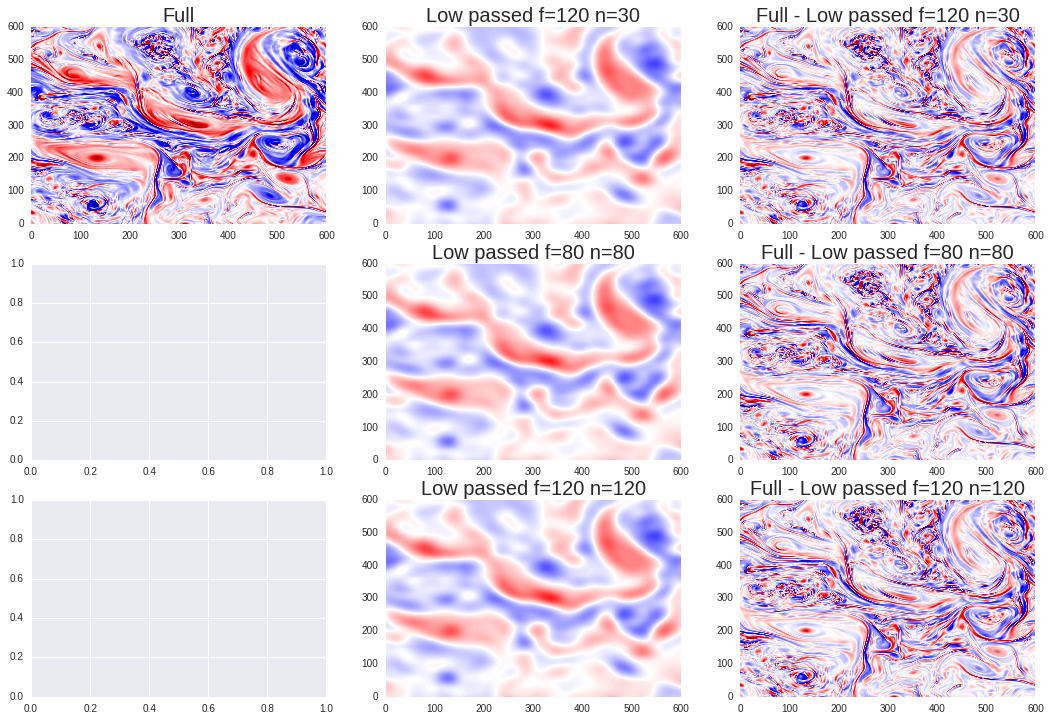

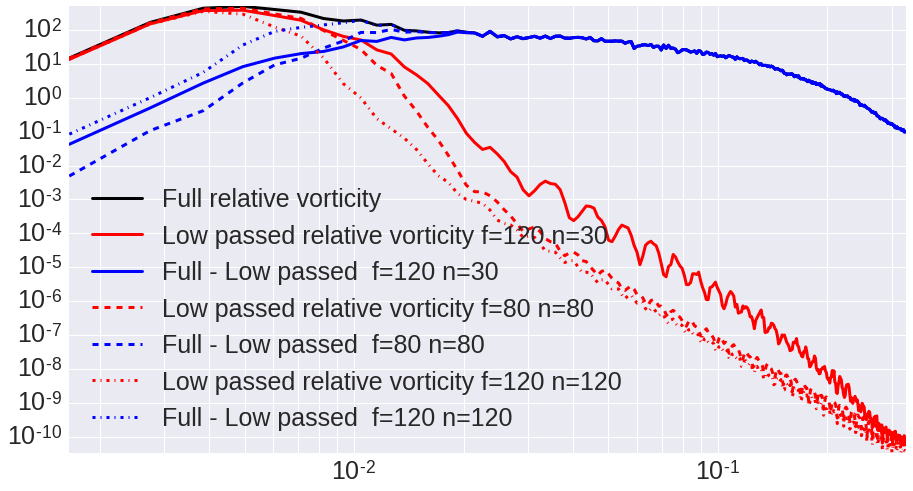

In [24]:
dir="/media/extra/DATA/NATL60/NATL60-CJM165-S/"
files03="NATL60-CJM165_y2013m03d*.1d_curloverf.nc"
tfiles03=dir+files03

filt30_files03="NATL60-CJM165_y2013m03d*.1d_socurloverf_filt2deg_n30.nc"
tf30_files03=dir+filt30_files03

filt80_files03="NATL60-CJM165_y2013m03d*.1d_socurloverf_filt2deg_fc80-n80.nc"
tf80_files03=dir+filt80_files03

filt120_files03="NATL60-CJM165_y2013m03d*.1d_socurloverf_filt2deg_n120.nc"
tf120_files03=dir+filt120_files03

gridfile="/media/extra/DATA/NATL60/NATL60-I/NATL60_grid.nc"

ds = xr.open_mfdataset(tfiles03,concat_dim='time_counter',decode_times=False)
lpds30 = xr.open_mfdataset(tf30_files03,concat_dim='time_counter',decode_times=False)
lpds80 = xr.open_mfdataset(tf80_files03,concat_dim='time_counter',decode_times=False)
lpds120 = xr.open_mfdataset(tf120_files03,concat_dim='time_counter',decode_times=False)
grid=xr.open_dataset(gridfile)

navlon = np.array(grid["nav_lon"]).squeeze()
navlat = np.array(grid["nav_lat"]).squeeze()

curl = ds['socurloverf']
hpcurl30 = lpds30['socurloverf']
hpcurl80 = lpds80['socurloverf']
hpcurl120 = lpds120['socurloverf']

def nice_plot5(full,lp1,hp1,lp2,hp2,lp3,hp3):
    fig, axarr = plt.subplots(3,3)
    fig.set_figheight(12)
    fig.set_figwidth(18)
    
    ax0 = axarr[0,0].pcolormesh(full,cmap=div_cmap,vmin=-1,vmax=1)
    axarr[0,0].set_title('Full',fontsize=20)
    axarr[0,0].axis('tight')
        
    ax1 = axarr[0,1].pcolormesh(lp1,cmap=div_cmap,vmin=-1,vmax=1)
    axarr[0,1].set_title('Low passed f=120 n=30',fontsize=20)
    axarr[0,1].axis('tight')

    ax2 = axarr[0,2].pcolormesh(hp1,cmap=div_cmap,vmin=-1,vmax=1)
    axarr[0,2].set_title('Full - Low passed f=120 n=30',fontsize=20)
    axarr[0,2].axis('tight')
        
    ax1 = axarr[1,1].pcolormesh(lp1,cmap=div_cmap,vmin=-1,vmax=1)
    axarr[1,1].set_title('Low passed f=80 n=80',fontsize=20)
    axarr[1,1].axis('tight')

    ax2 = axarr[1,2].pcolormesh(hp1,cmap=div_cmap,vmin=-1,vmax=1)
    axarr[1,2].set_title('Full - Low passed f=80 n=80',fontsize=20)
    axarr[1,2].axis('tight')
        
    ax1 = axarr[2,1].pcolormesh(lp1,cmap=div_cmap,vmin=-1,vmax=1)
    axarr[2,1].set_title('Low passed f=120 n=120',fontsize=20)
    axarr[2,1].axis('tight')

    ax2 = axarr[2,2].pcolormesh(hp1,cmap=div_cmap,vmin=-1,vmax=1)
    axarr[2,2].set_title('Full - Low passed f=120 n=120',fontsize=20)
    axarr[2,2].axis('tight')
    
zfull = curl[0,600:1200,1800:2400].values # si pas .values plot ok mais ne peut pas calculer le spectre
zfull[np.where(np.isnan(zfull))]=0. # 0. are missing values so they are converted to nan

zhp30 = hpcurl30[0,600:1200,1800:2400].values
zhp30[np.where(np.isnan(zhp30))]=0. # 0. are missing values so they are converted to nan
zlp30 = zfull - zhp30

zhp80 = hpcurl80[0,600:1200,1800:2400].values
zhp80[np.where(np.isnan(zhp80))]=0. # 0. are missing values so they are converted to nan
zlp80 = zfull - zhp80

zhp120 = hpcurl120[0,600:1200,1800:2400].values
zhp120[np.where(np.isnan(zhp120))]=0. # 0. are missing values so they are converted to nan
zlp120 = zfull - zhp120

nice_plot5(zfull,zlp30,zhp30,zlp80,zhp80,zlp120,zhp120)

#- compute the wavenumber spectrum
interp = 'basemap'
zlon = navlon[600:1200,1800:2400]
zlat = navlat[600:1200,1800:2400]

def compute_spectrum(var):
    data = var.squeeze()
    x_reg,y_reg,data_reg = ws.interpolate(data,zlon,zlat,interp=interp)
    pspec,kstep = ws.get_spectrum_1d(data_reg,x_reg,y_reg)
    return pspec, kstep

%time spectre_full = compute_spectrum(zfull)
%time spectre_hp30   = compute_spectrum(zhp30)
%time spectre_lp30   = compute_spectrum(zlp30)
%time spectre_hp80   = compute_spectrum(zhp80)
%time spectre_lp80   = compute_spectrum(zlp80)
%time spectre_hp120   = compute_spectrum(zhp120)
%time spectre_lp120   = compute_spectrum(zlp120)

#- plot the mean spectrum 
rad2cyc = 1.E3 / np.pi / 2. 

def nice_spectrum(spectre_full,spectre_hp1,spectre_lp1,spectre_hp2,spectre_lp2,spectre_hp3,spectre_lp3):
    fig, axarr = plt.subplots(1,1)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    #
    pspec,kstep = spectre_full
    pspec_lp1,kstep_lp1 = spectre_lp1
    pspec_hp1,kstep_hp1 = spectre_hp1
    pspec_lp2,kstep_lp2 = spectre_lp2
    pspec_hp2,kstep_hp2 = spectre_hp2
    pspec_lp3,kstep_lp3 = spectre_lp3
    pspec_hp3,kstep_hp3 = spectre_hp3
    skstep = kstep * rad2cyc
    y_min = 10 ** np.floor(np.log10(pspec.min())-1)
    y_max = 10 ** np.ceil( np.log10(pspec.max())+1)
    axarr.plot(skstep[1:], pspec[1:],'k-', lw=3, label='Full relative vorticity')
    axarr.plot(skstep[1:], pspec_lp1[1:],'r-', lw=3, label='Low passed relative vorticity f=120 n=30')
    axarr.plot(skstep[1:], pspec_hp1[1:],'b-', lw=3, label='Full - Low passed  f=120 n=30')
    axarr.plot(skstep[1:], pspec_lp2[1:],'r--', lw=3, label='Low passed relative vorticity f=80 n=80')
    axarr.plot(skstep[1:], pspec_hp2[1:],'b--', lw=3, label='Full - Low passed  f=80 n=80')
    axarr.plot(skstep[1:], pspec_lp3[1:],'r-.', lw=3, label='Low passed relative vorticity f=120 n=120')
    axarr.plot(skstep[1:], pspec_hp3[1:],'b-.', lw=3, label='Full - Low passed  f=120 n=120')
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    #axarr.set_xlabel('Wavenumber [cycle/km]',fontsize=16)
    axarr.set_xbound(1e-5*rad2cyc, 1e-2*rad2cyc)
    axarr.set_ybound(y_min, y_max)
    axarr.set_title('',fontsize=20)
    axarr.grid(True,which='both',ls='-')
    axarr.axis('tight')
    axarr.legend(loc="lower left", fontsize=25)
    axarr.tick_params(labelsize=25)

    #axarr.axvline(x=7e-3,ymin=1e-5,ymax=100, color='k',linewidth=3,linestyle='--')

nice_spectrum(spectre_full,spectre_hp30,spectre_lp30,spectre_hp80,spectre_lp80,spectre_hp120,spectre_lp120)
filename = '/media/extra/DATA/NATL60/NATL60-CJM165-PLOTS/filt_socurloverf/spectrum_filtLanczos_m03_all_param_socurloverf.png'
plt.savefig(filename,dpi=300,facecolor='w', edgecolor=None,bbox_inches='tight', pad_inches=0.1, rasterized=True)